## Iterator in Python 

Iterator là các đối tượng cho phép ta lấy từng phần tử của nó, hành động này có thể được lặp đi lặp lại.

### Iterator trong Python là gì?

Iterator ở khắp mọi nơi trong Python, bên trong các vòng lặp, comprehension, generator…

Nó đơn giản chỉ là các đối tượng cho phép ta lấy từng phần tử, bất cứ khi nào bạn sử dụng vòng lặp hay các kĩ thuật để có được giá trị một nhóm phần tử ở một thời điểm nào đó.

Về mặt kỹ thuật, Iterator trong Python phải thực hiện hai phương thức đặc biệt là __ iter__() và __ next__(), gọi chung là giao thức iterator (Iterator Protocol)
* Phương thức __ iter__ trả về chính đối tượng iterator. Phương thức này được yêu cầu cài đặt cho cả đối tượng "iterable" và iterator để có thể sử dụng các câu lệnh for và in.

* Phương thức __ next__ trả về phần tử tiếp theo. Nếu không còn phần tử nào nữa thì sẽ có lỗi StopIteration xảy ra.

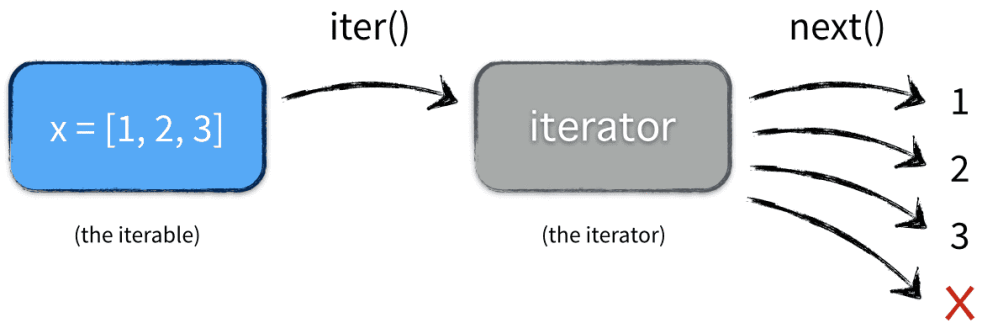

**Ví dụ:**

In [1]:
# Khai báo 1 list:
my_list = [4, 7, 0, 3]
my_list

[4, 7, 0, 3]

In [2]:
# Lấy một iterator bằng cách sử dụng iter()
my_iter = iter(my_list)

*my_iter hiện có đầy đủ giá trị của my_list*

In [3]:
# sử dụng next():

print(next(my_iter)) # In ra 4

print(next(my_iter)) # In ra 7

4
7


In [4]:
## next(obj) chính là obj.__next__():
 
print(my_iter.__next__()) # In ra 0
 
print(my_iter.__next__()) # In ra 3

0
3


*Hiện my_iter rỗng:*

In [5]:
# hiện my_iter hiện tại:

tuple(my_iter) 

# my_iter trống:

()

In [6]:
# Xảy ra lỗi StopIteration vì hết giá trị trả về:
print(next(my_iter))

StopIteration: 

Một cách tương tự trả về kết quả này là ta sử dụng vòng lặp for:

In [7]:
for element in my_list:
    print(element)

4
7
0
3


### Cách vòng lặp hoạt động
Như chúng ta thấy trong ví dụ trên, vòng lặp for có thể lặp lại tự động thông qua việc sử dụng danh sách.
Trong thực tế, vòng lặp for có thể lặp lại trên bất kỳ iterable nào. Chúng ta hãy xem kỹ hơn về cách vòng lặp for được thực hiện trong Python.

In [8]:
for element in my_list:
        print(element) # do something with element

4
7
0
3


Được thực hiện tương tự như:

In [9]:
my_list = [4, 7, 0, 3]

# iter_obj là một iterator object tạo từ my_list
iter_obj = iter(my_list)
 
# vòng lặp
while True:
     try:
        # sử dụng next
        print (next(iter_obj))
     except StopIteration:
        # nếu xảy ra lỗi StopIteration thì vòng lặp sẽ được break ra ngoài
        break

4
7
0
3


Ở ví dụ này, bên trong vòng lặp for ta tạo một iterator object tên là iter_obj bằng cách gọi iter() trên my_list.

Và như bạn thấy thì vòng lặp for ở đây chính là vòng lặp while vô hạn. Next() bên trong vòng lặp lấy ra các phần tử để thực hiện các câu lệnh ở for loop. Đến khi lấy hết các giá trị thì ngoại lệ StopIteration sẽ được sinh ra và vòng lặp kết thúc.

### Xây dựng trình vòng lặp Iterator trong Python
Chúng ta có thể tự xây dựng iterator là một class. Xây dựng Iterator rất dễ dàng trong Python, chúng ta chỉ cần thực hiện các phương thức __ iter__() và __ next__().

In [10]:
class PowTwo:
 
     def __init__(self, max = 0):
        self.max = max
 
     def __iter__(self):
        self.n = 0
        return self
 
     def __next__(self):
        if self.n <= self.max:
          result = 2 ** self.n
          self.n += 1
          return result
        else:
            raise StopIteration

Phương thức __ iter__ sẽ làm đối tượng trở thành đối tượng iterable.

Giá trị trả về của __ iter__ là một iterator. Nó cần có phương thức __ next__ và trả về StopIteration nếu không còn phần thử nào nữa.

Tạo ra một iterator và chạy chương trình như sau:

In [11]:
a = PowTwo(4)
i = iter(a)

print (next(i))
# 1

print (next(i))
# 2

print (next(i))
# 4

print (next(i))
# 8

print (next(i))
# 16

next(i)
#Traceback (most recent call last):
#...
#StopIteration:

1
2
4
8
16


StopIteration: 

### Iterator lặp vô hạn trong Python
Không phải tất cả các đối tượng iterator đều sẽ được gọi hết các phần tử và kết thúc khi không còn phần tử. Có một số trường hợp iterator sẽ lặp vô hạn. Ví dụ như sau:

In [12]:
int()
# 0

inf = iter(int,1)
print (next(inf))
# 0

print (next(inf))
# 0

0
0


Chúng ta có thể thấy rằng hàm int() luôn trả về 0. Vì vậy, việc truyền nó dưới dạng iter(int, 1) sẽ trả về một iterator lặp cho đến khi giá trị trả về bằng 1. Điều này không bao giờ xảy ra và đây chính là iterator lặp vô hạn. Bạn cần chú ý khi xử lý trong các trường hợp thế này.

Ngoài ra, bạn cũng có thể tự xây dựng iterator lặp vô hạn. Ví dụ sau đây sẽ lặp vô hạn và trả về các số lẻ vì không có điều kiện dừng nào cả.

In [13]:
class InfIter:

     def __iter__(self):
        self.num = 1
        return self

     def __next__(self):
        num = self.num
        self.num += 2
        return num

Chạy chương trình:

In [14]:
a = iter(InfIter())
print (next(a))
# 1

print (next(a))
# 3

print (next(a))
# 5
print (next(a))
# 7

1
3
5
7


Ưu điểm của việc sử dụng Iterator lặp là chúng tiết kiệm tài nguyên. Giống như hiển thị ở trên, bạn có thể nhận được tất cả các số lẻ mà không lưu trữ trên toàn bộ hệ thống số ở bộ nhớ.

